### Opening CSV file



This code block reads data from a CSV file (`records.csv`), processes it, and stores it in a list of dictionaries. Each dictionary will represent a single student record with labeled fields, which are: "Tutorial Group", "Student ID", "School", "Name", "Gender", and "CGPA".



In [29]:
# Define labels for each column in the CSV file, they will be used as keys in the dictionaries
labels = ["Tutorial Group","Student ID","School","Name","Gender","CGPA"]

# Open the file in read mode, file will be automatically closed 
with open('./records.csv', mode ='r') as file:    
    full_list = []                  # Create list to store all records
    next(file)                      # Skips the header row 
    for lines in file:
        line = {}                   # Create dictionary for storing each record
        lines = lines.rstrip()
        lines = lines.split(",")    # Splits each row with commas

        # Loops through each item in row and assigns it to the correct label
        for i in range(len(lines)):
            if labels[i] == "CGPA": # Converts 'CGPA' value to a float, keeping other values as strings
                line[labels[i]] = float(lines[i])
            else:
                line[labels[i]] = lines[i]
        full_list.append(line)      # Adds completed dictionary to the list

### Understanding Our Data

In [46]:
import matplotlib.pyplot as plt

Distribution of Students by Gender

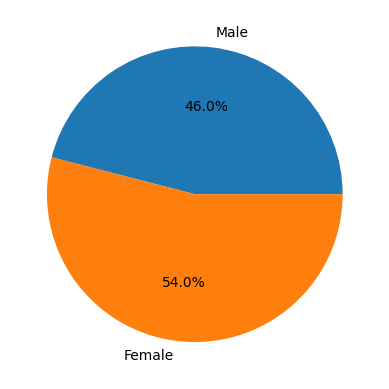

In [62]:
all_genders = [z["Gender"] for z in full_list]
male = all_genders.count("Male")
female = all_genders.count("Female")

labels = ["Male", "Female"]
sizes = [male, female]

plt.pie(sizes, labels=labels,autopct='%1.1f%%');

Distribution of Students by Schools

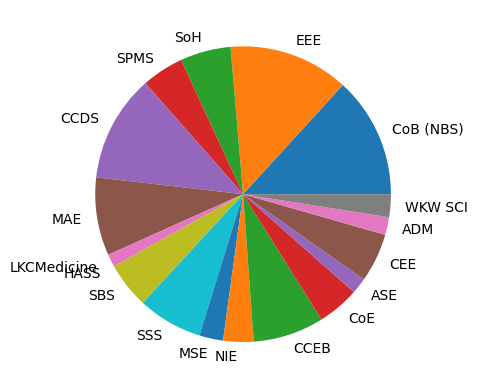

In [84]:
all_schools = [z["School"] for z in full_list]

labels = list(set(all_schools))

sizes = []
for i in labels:
    sizes.append(all_schools.count(i))

plt.pie(sizes, labels=labels);

Distribution of Students by CGPA

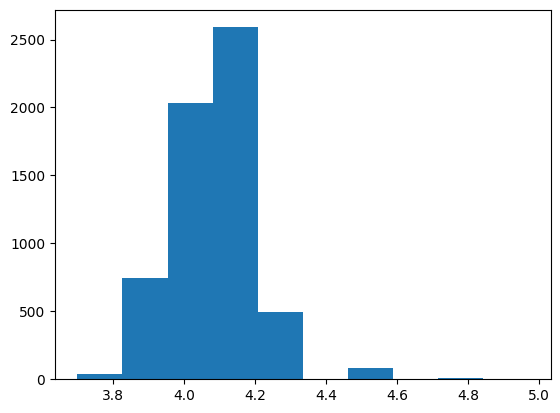

In [64]:
all_gpas = [z["CGPA"] for z in full_list]

plt.hist(all_gpas, bins = 10);

Some other Statistics
1. Sum
2. Count
3. Mean
4. Standard Deviation

In [80]:
sum_gpas = sum(all_gpas)
count = len(all_gpas)
mean = round(sum_gpas/count, 2)
sd = round((sum([round(z-mean, 2) for z in all_gpas])**2/count)**0.5, 3)

print("SUM   :", sum_gpas)
print("COUNT :", count)
print("MEAN  :", mean)
print("S.D.  :",sd)

SUM   : 24531.950000000077
COUNT : 6000
MEAN  : 4.09
S.D.  : 0.104


### Data Preprocessing

1. Sorts students by Tutorial Groups
2. Sorts students by Faculty within their Tutorial Groups
3. Sorts students by Gender within their Faculty

In [30]:
# Sorting the Students into Gender by School
def sortGender(school_list):
    gender = {}
    sum_gpa = 0
    for i in school_list:
        # Calculates the total CGPA of students in this Gender  
        sum_gpa += i["CGPA"] 
        # Removes the need to re-create the list of students for every student it checks
        if i["Gender"] in gender: 
            continue
        else:
            # Creates the list of students with the same gender as the current one
            # {Gender: [List of students]}
            gender[i["Gender"]] = [z for z in school_list if z["Gender"] == i["Gender"]]
    # Returns the Gender Dictionary and the Sum of CGPAs of students from this School
    return gender, sum_gpa

# Sorting the Students into School by Tutorial Group
def sortSchool(tut_list):
    school = {}
    sum_gpa = 0
    for i in tut_list:
        # Removes the need to re-create the list of students for every student it checks
        if i["School"] in school:
            continue
        else:
            # List of Students from the same School
            sch_list = [z for z in tut_list if z["School"] == i["School"]]
            # Calls the SortGender() Function to further sort the students into their Genders
            gend_list, cgpa = sortGender(sch_list)
            # Calculates the total CGPA of students in this School
            sum_gpa += cgpa 
            school[i["School"]] = gend_list
    # Returns the list of students sorted by School and Gender, and the Sum of CGPAs
    return school, sum_gpa

# Sorting the student into their Tutorial Groups
def sortTut(list):
    tutgrp = {}
    for i in list:
        sum_gpa = 0
        # Removes the need to re-create the list of students for every student it checks
        if i["Tutorial Group"] in tutgrp:
            continue
        else:
            # Creates a list of Students in the same Tutorial Group
            tut_list = [z for z in list if z["Tutorial Group"] == i["Tutorial Group"]]
            # Calls the SortSchool() Function to further sort the student in to their School Affiliations
            schl_list, cgpa = sortSchool(tut_list)
            # Calculates the total CGPA of students in this Tutorial Group
            sum_gpa += cgpa
            # Creates an entry in tutgrp
            # {Tutorial Group: [School: Gender: [List of Students], Average GPA of the Tutorial Group]}
            tutgrp[i["Tutorial Group"]] = [schl_list, round(sum_gpa/len(tut_list),2)]
    # Ultimately return a dictionary with all the Tutorial Groups
    return tutgrp

sorted_dict = sortTut(full_list)

Sample output of what our data will look like after the data processing step:

In [ ]:
{
  "G-1": {
    "CCDS": {
      "Male": [
        {"Student ID": 5002, "Name": "Aarav Singh", "Gender": "Male", "CGPA": 4.02}
      ],
      "Female": [
        {"Student ID": 4479, "Name": "Amelia Kim", "Gender": "Female", "CGPA": 4.11}
      ]
    },
    "EEE": {
      "Male": [
        {"Student ID": 2091, "Name": "Adlan Bin Rahman", "Gender": "Male", "CGPA": 4.20}
      ],
      "Female": [
        {"Student ID": 3838, "Name": "Aarti Nair", "Gender": "Female", "CGPA": 4.05},
        {"Student ID": 2115, "Name": "Anya Kumar", "Gender": "Female", "CGPA": 4.03}
      ]
    },
  }
}


### Algorithm

1. Get the number of males and females for the group
2. Get the number of students to take from the schools based on the gender counts
3. Get the student by comparing their GPA to the Group's and Tutorial Group's Average 

#### Gender:

1. Gets the number of males and females within the tutorial group
2. Calculates how many males and females to assign to each grouping

In [31]:
# Counts the number of Males and Females in the Tutorial Group
def getGenderCount(tut_dict):
    male = 0
    female = 0
    # Loops through the Schools
    for schools in tut_dict.values():
        # Loops through the Genders
        for gend, students in schools.items():
            # Adds the number of students to their corresponding Gender Count
            if gend == "Male":
                male += len(students)
            else:
                female += len(students)

    # Returns a Ratio of Males and Females in a Tuple
    return((male, female))

In [ ]:
# Calculates the number of Male and Females for each group
# We aim to reduce the number of groups that are imbalanced
def getGendNum(group_size, ratio):
    # Checks if the current group size is Even/Odd
    is_even = group_size % 2 == 0
    # Gets the number to take from each gender
    # E.G. Group Size = 5, each_gend = 2
    # E.G. Group Size = 5, each_gend = 3
    each_gend = group_size // 2
    # Ratio is the Tuple of 
    high, low = max(ratio), min(ratio)
    
# When ratio is 1 : 1
    if high == low:
        # If the group size is even
        if is_even == True:
            num_m = num_f = each_gend
        else:
            # There is a need to add 1 to either Gender
            # Or else the total won't match the Group Size
            num_m = each_gend
            num_f = each_gend + 1      

# Difference less than or equal to 10 (Difference not too large)
    elif high - low <= 10:
        # Male > Female and Group Size is even
        if ratio[0] > ratio[1] and is_even:
            num_m = each_gend + 1
            num_f = each_gend - 1
        # Male > Female and Group Size is not even
        elif ratio[0] > ratio[1]:
            num_m = each_gend + 1
            num_f = each_gend
        # Male < Female and Group Size is even
        elif ratio[0] < ratio[1] and is_even:
            num_m = each_gend - 1
            num_f = each_gend + 1
        # Male < Female and Group Size is not even
        else:
            num_m = each_gend
            num_f = each_gend + 1

# Difference larger than 10 (Difference is large)
    else:
        # Male > Female and Group Size is even 
        if ratio[0] > ratio[1] and is_even:
            num_m = each_gend + 2
            num_f = each_gend - 2
        # Male > Female and Group Size is not even
        elif ratio[0] > ratio[1]:
            num_m = each_gend + 2
            num_f = each_gend - 1
        # Male < Female and Group Size is even
        elif ratio[0] < ratio[1] and is_even:
            num_m = each_gend - 2
            num_f = each_gend + 2
        # Male < Female and Group Size is not even
        else:
            num_m = each_gend - 1
            num_f = each_gend + 2
    
    # Returns the number of Males and Females to take for each group
    return num_m,num_f

### School Affliation:

1. Counts the number of students from each school by gender
2. Sorts the list from smallest to largest

In [33]:
# Counts the number of students from each school by gender
def getSchlCount(tut_dict):
    schls_count = {}
    for schl, val in tut_dict.items():
        gends_count = {}
        
        for gend, students in val.items():
            gends_count[gend] = len(students)
            
        schls_count[schl] = gends_count
    # Returns a Dictionary of counts by school and gender
    return(schls_count)

In [34]:
# Returns List of Counts of students from each school of a specific gender
def getSchlGend(tut_dict, gend):
    # Gets counts of students from each school of all genders
    schls_count = getSchlCount(tut_dict)
    max_gend = []
    for school, genders in schls_count.items():
        try:
            max_gend.append([school, genders[gend]])
        except:
            continue
    # Sorts list from Lowest Count --> Highest Count
    sorted_list = sorted(max_gend, key=lambda x:x[1])
    return sorted_list

### CGPA:

1. Compares the students in the list by school and gender
2. Gets the best suited student to balance the CGPA of the group

In [35]:
# Returns the Selected Student and the Updated List of students
def getStudentbyGpa(student_list, avg_gpa, group_gpa):
    student = 0
    # Loops through List of Students
    for i in student_list:
        ref_gpa = avg_gpa
        # If the Group's Average GPA is equal to the Tutorial Group's Average GPA
        # Gets the first student
        if group_gpa == avg_gpa:
            # We remove the student from the list to avoid repeats
            student = student_list.pop(student_list.index(i))
            break
        # If the Group's Average GPA is greater than the Tutorial Group's Average GPA
        elif group_gpa > avg_gpa:
            # Checks if the diffence is large
            # Makes the Reference GPA lower
            if group_gpa - avg_gpa > 0.2:
                ref_gpa -= 0.2
            # Checks the Current Student's GPA against the Reference GPA
            # If it is lower or equal to, picks that student
            if i["CGPA"] <= ref_gpa:
                # We remove the student from the list to avoid repeats
                student = student_list.pop(student_list.index(i))
                break
        # If the Group's Average GPA is lesser than the Tutorial Group's Average GPA
        else:
            # Checks if the diffence is large
            # Makes the Reference GPA Higher
            if avg_gpa - group_gpa > 0.2:
                ref_gpa += 0.2
            # Checks the Current Student's GPA against the Reference GPA
            # If it is higher or equal to, picks that student
            if i["CGPA"] >= ref_gpa:
                # We remove the student from the list to avoid repeats
                student = student_list.pop(student_list.index(i))
                break
    # After looping through the list of students
    # If there isn't a suitable student, we get the first student in the list
    if student == 0:
        group_gpa = avg_gpa
        student, student_list = getStudentbyGpa(student_list, avg_gpa, group_gpa)
    # We return the updated list as well
    return student, student_list

In [ ]:
# Get the students for each Group
def getGroups(tut_dict, num_m, num_f, avg_gpa):
    group_size = num_m + num_f
    group = []
    sch_used = []
    group_gpa = 0.0

    # Looping to get the students in the Group
    while len(group) < group_size:
        student = 0
        i = 0
        # Which Gender to take
        if len(group) < num_m:
            gend = "Male"
            # Needed to take students from schools with low and high counts
            num = num_m
            # Males are first, thus no need to remove anything
            opp_num = 0 
        else:
            gend = "Female"
            # Needed to take students from schools with low and high counts
            num = num_f
            # Females are second, thus we need to remove from the group size
            opp_num = num_m

        sorted_schl = getSchlGend(tut_dict, gend)
        if sorted_schl == []:
            break

        # Don't Continue until we get a student
        while student == 0:
            try:
                # Gets the Student from the School with the LOWEST Count
                if len(group) - opp_num < (num//2):
                    schl = sorted_schl[i][0]
                    num_of_students = sorted_schl[i][1]
                # Gets the Student from the School with the HIGHEST Count
                else:
                    schl = sorted_schl[-i-1][0]
                    num_of_students = sorted_schl[-i-1][1]
            except:
                # If the index is larger, we divide it by 2
                i //= 2
            
            # Checks if the school was used in the group
            if schl in sch_used:
                # If we already looped through the list of schools to pick from
                if i == len(sorted_schl)-1:
                    # Empty the sch_used list
                    sch_used = []
                i += 1
                continue

            # If there is only 1 student, No need to loop through
            if num_of_students == 1:
                student = tut_dict[schl][gend].pop()
                # Since the List will be empty, we delete it to prevent conflicts
                del tut_dict[schl][gend]
            else:
                # Call the function to try and balance the CGPA
                student, tut_dict[schl][gend] = getStudentbyGpa(tut_dict[schl][gend], avg_gpa, group_gpa)
            try:
                # If the List is empty, we delete it to prevent conflicts
                if tut_dict[schl][gend] == []:
                    del tut_dict[schl][gend]
            except:
                continue
            
            i += 1
        
        sch_used.append(schl)
        group.append(student)
        group_gpa = round((((len(group)-1)*group_gpa)+student["CGPA"])/len(group), 2)
        
    # We return the updated dictionary as well
    return group, tut_dict

### Main Code

In [37]:
def main_basic(full_dict):
    group_size = 5
    all_groups = {}
    for tut, value in full_dict.items():
        # Get Tutorial Group Information
        ratio = getGenderCount(value[0])
        class_size = ratio[0] + ratio[1]
        num_of_grps = class_size // group_size

        # List to hold all groups in the Tutorial Group
        tut_grps = []
        
        for i in range(num_of_grps):
            # Gets the Gender Count for the Tutorial Group 
            # Need to check as the number of students will change
            ratio = getGenderCount(value[0])
            # Gets the Number of Males and Females to Get for each Group
            num_m, num_f = getGendNum(group_size, ratio)
            
            # If it is the last group, we just add in the remainding students
            if i == num_of_grps-1:
                group = []
                for schl, val in value[0].items():
                    for gend, v in val.items():
                        for stu in v:
                            group.append(stu)
            else:
                # Calls the function to get each group of students
                group, value[0] = getGroups(value[0], num_m, num_f, value[1])
                
            tut_grps.append([i+1, group])
        all_groups[tut] = tut_grps
    return all_groups

all_groups = main_basic(sorted_dict)

In [38]:
# Added Variable Group Size
def main_adv(full_dict, group_size = 6):
    all_groups = {}
    for tut, value in full_dict.items():
        # Get Tutorial Group Information
        ratio = getGenderCount(value[0])
        class_size = ratio[0] + ratio[1]
        num_of_grps = class_size // group_size
        num_of_extra = class_size % group_size

        # List to hold all groups in the Tutorial Group
        tut_grps = []
        
        for i in range(num_of_grps):
            # Gets the Gender Count for the Tutorial Group 
            # Need to check as the number of students will change
            ratio = getGenderCount(value[0])
            # If there are extra students, the first few groups will have extras
            if i < num_of_extra:
                extra = group_size + 1
                # Gets the Number of Males and Females to Get for Groups with extras
                num_m, num_f = getGendNum(extra, ratio)
            else:
                # Gets the Number of Males and Females to Get for Groups without extras
                num_m, num_f = getGendNum(group_size, ratio)
            # If it is the last group, we just add in the remainding students
            if i == num_of_grps-1:
                group = []
                for schl, val in value[0].items():
                    for gend, v in val.items():
                        for stu in v:
                            group.append(stu)
            else:
                # Calls the function to get each group of students
                group, value[0] = getGroups(value[0], num_m, num_f, value[1])
                
            tut_grps.append([i+1, group])
        all_groups[tut] = tut_grps
    return all_groups

all_groups_adv = main_adv(sorted_dict)

### Outputting Data into a File

In [39]:
with open("result.csv", "w") as file:
    file.write(','.join(labels)+",Team Assigned"+"\n")
    for tut, value in all_groups.items():
        for i in value:
            group_num = i[0]
            for student in i[1]:
                file.write(f"""{student["Tutorial Group"]},{student["Student ID"]},{student["School"]},{student["Name"]},{student["Gender"]},{student["CGPA"]},{group_num}\n""")